# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st



## Load data

In [83]:
megaline_calls = pd.read_csv('megaline_calls.csv')
megaline_internet = pd.read_csv('megaline_internet.csv')
megaline_messages = pd.read_csv('megaline_messages.csv')
megaline_plans = pd.read_csv('megaline_plans.csv')
megaline_users = pd.read_csv('megaline_users.csv')

## Prepare the data

In [84]:
megaline_calls.head() 
megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Calls DataFrame columns:

id - unique text message identifier 

message_date - text message date

user_id - the identifier of the user sending the text

In [85]:
megaline_internet.head() 
megaline_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


Internet DataFrame columns:

id - unique session identifier

mb_used - the volume of data spent during the ession (in megabytes)

session_date - web session date

user_id - user identifier 

In [86]:
megaline_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Messages DataFrame columns:

id - unique text message identifier 

message_date - text message date

user_id - the identifier 

In [87]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Surf

- Monthly charge: $20

- 500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate

- Monthly charge: $70

- 3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:

1 minute: 1 cent

1 text message: 1 cent

1 GB of data: $7

Plans DataFrame columns:

plan_name — calling plan name

usd_monthly_fee — monthly charge in US dollars

minutes_included — monthly minute allowance

messages_included — monthly text allowance

mb_per_month_included — data volume allowance (in megabytes)

usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)

usd_per_message — price per text after exceeding the package limits

usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)


In [88]:
megaline_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Users DataFrame columns:

user_id — unique user identifier

first_name — user's name

last_name — user's last name

age — user's age (years)

reg_date — subscription date (dd, mm, yy)

churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this 
database was extracted)

city — user's city of residence

plan — calling plan name


## Plans

In [89]:
# Print the general/summary information about the plans' DataFrame
megaline_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [90]:
# Print a sample of data for plans

megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Surf

- Monthly charge: $20

- 500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

 Ultimate

- Monthly charge: $70

- 3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:

1 minute: 1 cent

1 text message: 1 cent

1 GB of data: $7

 [Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I did NOT notice anything peculiar about any of the data sets. No missing values for any of the Data Frames besides the users DataFrame as many of the plans as indicated by 'churn_date' were still on going when data was being collected. I also checked for duplicate values and checked for missing values using duplicated().sum() and isna().sum() methods and did not find anything. As well as the data types for the columns seem to be accurate

## Users

In [91]:
# Print the general/summary information about the users' DataFrame

megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [92]:
# Print a sample of data for users

megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

I noticed the dates for the date column were not datetime data types there I will change

In [93]:
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format= '%Y-%m-%dT')

megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

## Calls

In [94]:
# Print the general/summary information about the calls' DataFrame
megaline_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [95]:
# Print a sample of data for calls

megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The Date Time column does not have Date Time values

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [96]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format= '%Y-%m-%dT')

megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Messages

In [97]:
# Print the general/summary information about the messages' DataFrame

megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [98]:
# Print a sample of data for messages

megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Date time column does not have date time date time values 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [99]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format= '%Y-%m-%dT')
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [100]:
# Print the general/summary information about the internet DataFrame

megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [101]:
# Print a sample of data for the internet traffic
megaline_internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Datetime column does not have date time values

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [102]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format= '%Y-%m-%dT')
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [103]:
# Print out the plan conditions and make sure they are clear for you
megaline_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [104]:
# Calculate the number of calls made by each user per month. Save the result.


megaline_calls['month'] = megaline_calls['call_date'].dt.month
megaline_calls.sort_values(by='month', ascending=False)


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
64083,1232_368,1232,2018-12-26,0.00,12
63896,1232_133,1232,2018-12-27,10.60,12
63908,1232_147,1232,2018-12-27,0.00,12
63909,1232_149,1232,2018-12-27,9.81,12
...,...,...,...,...,...
101985,1362_745,1362,2018-01-19,4.61,1
54976,1196_875,1196,2018-01-23,4.77,1
51039,1185_77,1185,2018-01-28,11.58,1
101431,1362_176,1362,2018-01-28,9.89,1


In [105]:
megaline_calls['user_id'].duplicated().sum()

137254

In [106]:
calls_per_user_month = megaline_calls.groupby(['user_id', 'month'])['id'].count().reset_index(name='number_of_calls')
calls_per_user_month.head()

,user_id,month,number_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [107]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_min_per_month = megaline_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name= 'total_minutes_phone')


In [108]:
calls_min_per_month.head()

,user_id,month,total_minutes_phone
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [109]:
# Calculate the number of messages sent by each user per month. Save the result.

megaline_messages['month'] = megaline_messages['message_date'].dt.month
megaline_messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


In [110]:
number_messages_per_month = megaline_messages.groupby(['user_id', 'month'])['id'].count().reset_index(name= 'messages_per_month')
number_messages_per_month.head()

,user_id,month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [111]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

megaline_internet['month'] = megaline_internet['session_date'].dt.month
megaline_internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


In [112]:
volume_of_traffic = megaline_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name= 'volume_of_data_on_internet')
volume_of_traffic

,user_id,month,volume_of_data_on_internet
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [113]:
# Merged the data for calls, minutes, messages, internet based on user_id and month

merged_data = pd.merge(calls_per_user_month, calls_min_per_month , on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, number_messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, volume_of_traffic, on=['user_id', 'month'], how='outer')
merged_data

,user_id,month,number_of_calls,total_minutes_phone,messages_per_month,volume_of_data_on_internet
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


Surf

Monthly charge: $20

500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits: 1 minute: 3 cents 1 text message: 3 cents 1 GB of data: $10

Ultimate

Monthly charge: $70

3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:

1 minute: 1 cent

1 text message: 1 cent

1 GB of data: $7

In [114]:
merged_data['volume_of_data_on_internet_gb'] = merged_data['volume_of_data_on_internet'] / 1024


There are 1024 megabytes in each gigabyte so I needed to convert this column of data to make analsysis easier since exceeding volume prices are set from gigabytes 

In [205]:
merged_data_with_plans = pd.merge(merged_data, megaline_users[['user_id', 'plan']], on='user_id', how='left')
# this added the plan names by each user to our df

merged_data_with_plans.head()

,user_id,month,number_of_calls,total_minutes_phone,messages_per_month,volume_of_data_on_internet,volume_of_data_on_internet_gb,plan
0,1000,12,16.0,116.83,11.0,1901.47,1.856904,ultimate
1,1001,8,27.0,171.14,30.0,6919.15,6.756982,surf
2,1001,9,49.0,297.69,44.0,13314.82,13.002754,surf
3,1001,10,65.0,374.11,53.0,22330.49,21.807119,surf
4,1001,11,64.0,404.59,36.0,18504.30,18.070605,surf


In [116]:
# Calculated the monthly revenue for each user

def calculate_revenue(row):
    if row['plan'] == 'surf':
        free_minutes = 500
        free_texts = 50
        free_data_gb = 15
        extra_minute_cost = 0.03  # 3 cents
        extra_text_cost = 0.03    # 3 cents
        extra_data_cost = 10      # $10 per additional GB
    
    # Monthly charge
        monthly_charge = 20
    elif row['plan'] == 'ultimate':
        free_minutes = 3000
        free_texts = 1000
        free_data_gb = 30
        extra_minute_cost = 0.01
        extra_text_cost = 0.01
        extra_data_cost = 7
        monthly_charge = 70
        
    # Calculated extra usage using the max function to ensure that we can't have negative outcomes, the max is 0 which would mean no additional charges 
    extra_minutes = max(0, row['total_minutes_phone'] - free_minutes)
    extra_texts = max(0, row['messages_per_month'] - free_texts)
    extra_data_gb = max(0, row['volume_of_data_on_internet_gb'] - free_data_gb)
    
    # Calculated additional charges
    extra_minute_charge = extra_minutes * extra_minute_cost
    extra_text_charge = extra_texts * extra_text_cost
    extra_data_charge = np.floor(extra_data_gb) * extra_data_cost  # Rounded down to the next GB because you only get charged once you use another FULL gigabyte
    
    # Total revenue for the month
    total_revenue = monthly_charge + extra_minute_charge + extra_text_charge + extra_data_charge
    return total_revenue



In [117]:
# Creating my new column while using the apply method and the name of my function
merged_data_with_plans['total_revenue'] = merged_data_with_plans.apply(calculate_revenue, axis=1)

# I summed up the revenue for each user across all months, I grouped by user_id and sum the monthly revenues
total_revenue_per_user = merged_data_with_plans.groupby(['user_id', 'month'])['total_revenue'].sum().reset_index()

total_revenue_per_user.head()

,user_id,month,total_revenue
0,1000,12,70.00
1,1001,8,20.00
2,1001,9,20.00
3,1001,10,80.09
4,1001,11,50.00


In [118]:
total_revenue_per_user.sort_values(by= 'total_revenue', ascending= False).round(2)

,user_id,month,total_revenue
1756,1379,12,578.64
570,1121,12,521.41
1357,1292,8,370.00
1361,1292,12,370.00
1128,1240,8,366.17
...,...,...,...
448,1095,10,20.00
447,1095,9,20.00
446,1095,8,20.00
445,1095,7,20.00


In [119]:
monthly_revenue = pd.merge(total_revenue_per_user, merged_data_with_plans[['user_id', 'plan']], on='user_id', how='left')

In [120]:
monthly_revenue

,user_id,month,total_revenue,plan
0,1000,12,70.0,ultimate
1,1001,8,20.0,surf
2,1001,8,20.0,surf
3,1001,8,20.0,surf
4,1001,8,20.0,surf
...,...,...,...,...
14904,1499,11,30.0,surf
14905,1499,12,80.0,surf
14906,1499,12,80.0,surf
14907,1499,12,80.0,surf


In [121]:
Totals_DataFrame = merged_data_with_plans.rename(columns={'volume_of_data_on_internet': 'volume_of_data_on_internet_mb'})

In [207]:
Totals_DataFrame

,user_id,month,number_of_calls,total_minutes_phone,messages_per_month,volume_of_data_on_internet_mb,volume_of_data_on_internet_gb,plan,total_revenue
0,1000,12,16.0,116.83,11.0,1901.47,1.856904,ultimate,70.00
1,1001,8,27.0,171.14,30.0,6919.15,6.756982,surf,20.00
2,1001,9,49.0,297.69,44.0,13314.82,13.002754,surf,20.00
3,1001,10,65.0,374.11,53.0,22330.49,21.807119,surf,80.09
4,1001,11,64.0,404.59,36.0,18504.30,18.070605,surf,50.00
...,...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,12.734287,surf,20.33
2289,1361,5,NaN,NaN,2.0,1519.69,1.484072,surf,20.00
2290,1482,10,NaN,NaN,2.0,NaN,NaN,ultimate,70.00
2291,1108,12,NaN,NaN,NaN,233.17,0.227705,ultimate,70.00


## Study user behaviour

### Calls

In [123]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_calls_plan_month = Totals_DataFrame.groupby(['plan', 'month'])['total_minutes_phone'].mean().reset_index()
avg_calls_plan_month

,plan,month,total_minutes_phone
0,surf,1,192.840000
1,surf,2,280.851111
2,surf,3,310.970000
3,surf,4,332.380000
4,surf,5,387.108000
5,surf,6,411.450625
6,surf,7,428.060917
7,surf,8,394.474717
8,surf,9,397.133298
9,surf,10,414.435733


In [124]:
avg_call_duration_pivot = avg_calls_plan_month.pivot(index='month', columns='plan', values='total_minutes_phone')
# Created a pivot chart that has the months as my index, the plan values as my columns and the total_minutes_phone mean as my values 
avg_call_duration_pivot

plan,surf,ultimate
month,,
1,192.840000,183.162500
2,280.851111,443.171667
3,310.970000,285.701667
4,332.380000,316.508095
5,387.108000,383.664828
6,411.450625,365.358222
7,428.060917,403.767288
8,394.474717,397.274789
9,397.133298,413.287326


In [125]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.


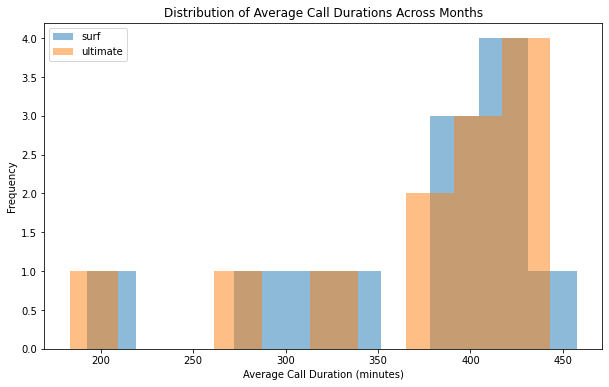

In [126]:
plt.figure(figsize=(10, 6))


plt.hist(avg_call_duration_pivot['surf'], alpha=0.5, label='surf')
plt.hist(avg_call_duration_pivot['ultimate'], alpha=0.5, label='ultimate')

plt.title('Distribution of Average Call Durations Across Months')
plt.xlabel('Average Call Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

This histogram shows the distribution of average call durations for two different phone plans, Surf and Ultimate across various months. The X axis represents the average call curation in minutes while the Y axis indicates the frequency or count of average duration values within each bin, which in this case is the number of monthly averages. The histogram helps visually compare which plans tends to have higher or lower call duration times amd how these averages distribute across the bins (range of minutes).

Plan bars that are more towards the right indicate a higher call duration time and if the bars are taller that suggests that the average call duration time happens frequently in this case the maximum number of monthsthat could occur for a given average is 4.

For the Surf plan labeled in blue, we see that the average total duration for minutes on the phone in a month is most common at around 400 minutes which is also around 6 and half hours. 

For the Ultimate plan labeled in orange, we see that the average total duration for minutes on the phone in a month is most common a little bit higher than surf at around 425 which is around 7 hours.

The Data is also negatively skewed for both the Surf and the Ultimate plan meaning the mean of average phone time for both plans is less than the median. More often than not people are on the phone longer than the mean indicating some outliers.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [127]:
surf_phone_min_data = avg_calls_plan_month[avg_calls_plan_month['plan'] == 'surf']['total_minutes_phone']
ultimate_phone_min_data = avg_calls_plan_month[avg_calls_plan_month['plan'] == 'ultimate']['total_minutes_phone']

In [210]:
surf_phone_min_data

0     192.840000
1     280.851111
2     310.970000
3     332.380000
4     387.108000
5     411.450625
6     428.060917
7     394.474717
8     397.133298
9     414.435733
10    408.255415
11    457.547074
Name: total_minutes_phone, dtype: float64

In [129]:
# Calculate the mean and the variance of the monthly call duration
surf_mean_call_duration = surf_phone_min_data.mean()
surf_mean_call_duration

367.95890750535744

In [130]:
surf_variance_call_duration = surf_phone_min_data.var()
surf_variance_call_duration

5636.603596037749

In [131]:
ultimate_mean_call_duration = ultimate_phone_min_data.mean()
ultimate_mean_call_duration

373.6460944732439

In [132]:
ultimate_mean_call_duration = ultimate_phone_min_data.var()
ultimate_mean_call_duration

5925.107083650145

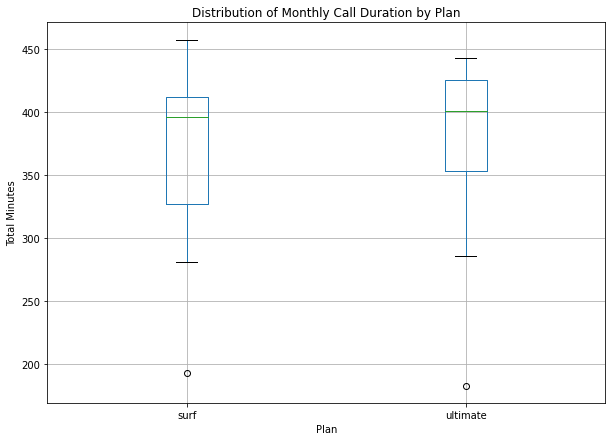

In [133]:
# Plot a boxplot to visualize the distribution of the monthly call duration
avg_call_duration_pivot.plot(kind='box', figsize=(10, 7))
plt.title('Distribution of Monthly Call Duration by Plan')
plt.ylabel('Total Minutes')
plt.xlabel('Plan')
plt.grid(True)
plt.show()

Based on the data the Ultimate plan has a slightly higher median of total duration of minutes on the phone per month than the Surf plan.

Also the surf plans range of minutes are a little bit more dispersed than the ultimate meaning theres more data that occured in the lower quartiles between 325-350 minutes on average while there's a little bit less variability with the ultimate plan.

However it should be noted the two are very similar

### Messages

In [134]:
# Compare the number of messages users of each plan tend to send each month

number_of_messages = Totals_DataFrame.groupby(['plan', 'month'])['messages_per_month'].mean().reset_index()

number_of_messages

,plan,month,messages_per_month
0,surf,1,21.000000
1,surf,2,21.600000
2,surf,3,21.937500
3,surf,4,24.166667
4,surf,5,33.017857
5,surf,6,33.616438
6,surf,7,35.945055
7,surf,8,37.596774
8,surf,9,39.523179
9,surf,10,42.433862


In [212]:
surf_avg_mess = number_of_messages[number_of_messages['plan'] == 'surf']['messages_per_month'].mean()

surf_avg_mess

33.30976679539808

In [136]:
surf_var_mess = number_of_messages[number_of_messages['plan'] == 'surf']['messages_per_month'].var()
surf_var_mess

84.26436783310633

In [137]:
ultimate_avg_mess = number_of_messages[number_of_messages['plan'] == 'ultimate']['messages_per_month'].mean()
ultimate_avg_mess

39.47232523405716

In [138]:
ultimate_var_mess = number_of_messages[number_of_messages['plan'] == 'ultimate']['messages_per_month'].var()
ultimate_var_mess

106.65535848341665

In [139]:
avg_messages_month_pivot = number_of_messages.pivot(index='month', columns='plan', values='messages_per_month')
avg_messages_month_pivot

plan,surf,ultimate
month,,
1,21.000000,20.666667
2,21.600000,25.166667
3,21.937500,34.714286
4,24.166667,28.937500
5,33.017857,44.333333
6,33.616438,36.289474
7,35.945055,41.212766
8,37.596774,47.929825
9,39.523179,45.901408


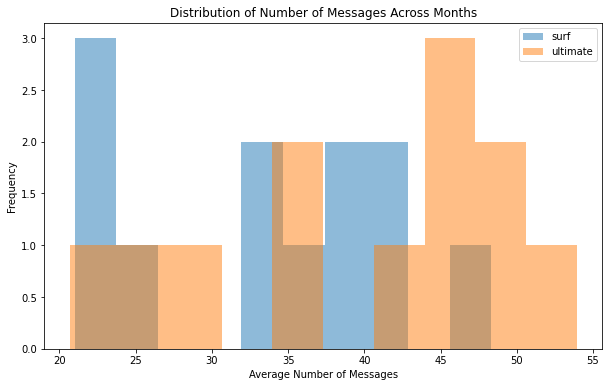

In [140]:
plt.figure(figsize=(10, 6))


plt.hist(avg_messages_month_pivot['surf'], alpha=0.5, label='surf')
plt.hist(avg_messages_month_pivot['ultimate'], alpha=0.5, label='ultimate')

plt.title('Distribution of Number of Messages Across Months')
plt.xlabel('Average Number of Messages')
plt.ylabel('Frequency')
plt.legend()

plt.show()

This histogram shows the distribution of the average number of messages for two different phone plans, Surf and Ultimate across various months. The X axis represents the average number of messages while the Y axis indicates the frequency or the most common averages that occured. The histogram helps visually compare which plans tends to have more or less messages on average and how these averages distribute across the bins (range of average number of minutes).

Plan bars that are more towards the right indicate more messages sent on average and if the bars are taller that suggests that the average number of messages in those values within the bin on the x axis were more common. 

For the Surf plan labeled in blue, we see that the average total number of messages per month is most common between 20 and 25 messgaes.

For the Ultimate plan labeled in orange, we see that the average total number of messages per month is most common at around 45 messages per month.


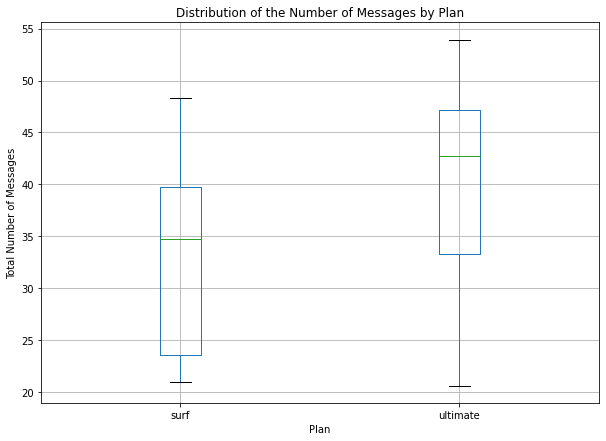

In [141]:
# Plot a boxplot to visualize the distribution of the monthly call duration
avg_messages_month_pivot.plot(kind='box', figsize=(10, 7))
plt.title('Distribution of the Number of Messages by Plan')
plt.ylabel('Total Number of Messages')
plt.xlabel('Plan')
plt.grid(True)
plt.show()

Based on the data the Ultimate plan has a much higher median of total number of messages sent on the phone per month, between 40 and 45 messages, while the Surf plan is only at a median of around 35 messages per month. 

Also the ultimate plan's values are less distrubtive meaning less dispersed between around 35 to 45 messages per month while the Surf plan is more dispersed with a much lower number of messages per month around 25 to 40 messages.

This basically means with the Ultimate plan theres less variability and more often than not most people will be between 35-45 

### Internet

In [142]:
# Compare the amount of internet traffic consumed by users per plan
traffic_consumed = Totals_DataFrame.groupby(['plan', 'month'])['volume_of_data_on_internet_gb'].mean().reset_index()
traffic_consumed

,plan,month,volume_of_data_on_internet_gb
0,surf,1,4.760605
1,surf,2,11.893402
2,surf,3,13.032656
3,surf,4,11.942167
4,surf,5,13.788797
5,surf,6,15.257487
6,surf,7,16.526820
7,surf,8,16.711157
8,surf,9,16.286521
9,surf,10,17.122339


In [143]:
avg_data_consumed_pivot = traffic_consumed.pivot(index='month', columns='plan', values='volume_of_data_on_internet_gb')
avg_data_consumed_pivot


plan,surf,ultimate
month,,
1,4.760605,6.755950
2,11.893402,16.727352
3,13.032656,17.892108
4,11.942167,15.743803
5,13.788797,16.234846
6,15.257487,14.978439
7,16.526820,15.961664
8,16.711157,17.397188
9,16.286521,16.572138


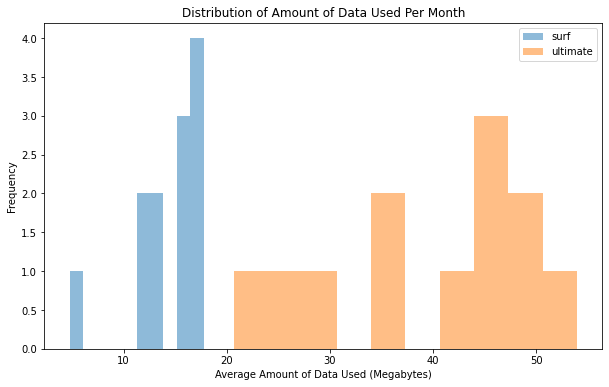

In [144]:
plt.figure(figsize=(10, 6))


plt.hist(avg_data_consumed_pivot['surf'], alpha=0.5, label='surf')
plt.hist(avg_messages_month_pivot['ultimate'], alpha=0.5, label='ultimate')

plt.title('Distribution of Amount of Data Used Per Month')
plt.xlabel('Average Amount of Data Used (Megabytes)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

This histogram shows the distribution of the average amount of Data Used for two different phone plans, Surf and Ultimate across various months. The X axis represents the average amount of data used the while the Y axis indicates the frequency or the most common averages that occured. The histogram helps visually compare which plans tend to have a higher or lower average when it comes to data consumption and these averages are distributed across the bins, each bin representing a range of values not only one.

Plan bars that are more towards the right indicate more data used on average and if the bars are taller that suggests that the frequency of the range of average data usage (bins) amongst people is common. 

For the Surf plan labeled in blue, we see that the average amount of data used is most common between 10 and 20 megabytes.

For the Ultimate plan labeled in orange, we see that the average amount of data used is most common between 40 and 50 megabytes.


In [145]:
surf_mean_data = traffic_consumed[traffic_consumed['plan'] == 'surf']['volume_of_data_on_internet_gb'].mean()
surf_mean_data

14.2629309102169

In [146]:
surf_var_data = traffic_consumed[traffic_consumed['plan'] == 'surf']['volume_of_data_on_internet_gb'].var()
surf_var_data

12.99367469251311

In [147]:
ultimate_mean_data = traffic_consumed[traffic_consumed['plan'] == 'ultimate']['volume_of_data_on_internet_gb'].mean()
ultimate_mean_data

15.846271234979925

In [148]:
ultimate_var_data = traffic_consumed[traffic_consumed['plan'] == 'ultimate']['volume_of_data_on_internet_gb'].var()
ultimate_var_data

8.961038195932794

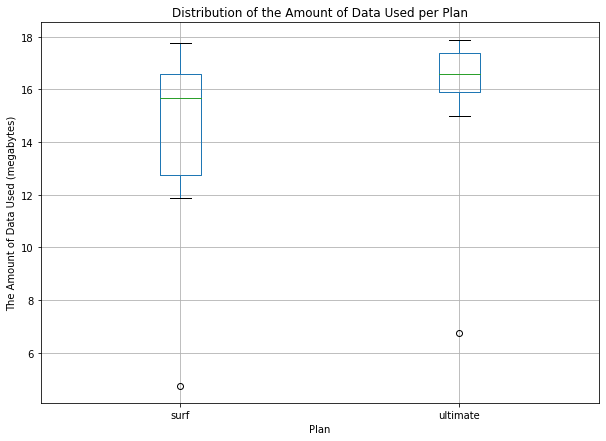

In [149]:
# Plot a boxplot to visualize the distribution of the monthly call duration
avg_data_consumed_pivot.plot(kind='box', figsize=(10, 7))
plt.title('Distribution of the Amount of Data Used per Plan')
plt.ylabel('The Amount of Data Used (megabytes)')
plt.xlabel('Plan')
plt.grid(True)
plt.show()

Based on the data the Ultimate plan has a higher median of amount of data used per month, between 16 and 18 megabytes, while the Surf plan is at a median between 14 and 16 megabytes.

The biggest difference of the two is that the ultimate plan's values are much less distributive than the surf plan. The vast majority of people on the ultimate plan use between 16 and 18 megabytes very similar to our median, however the surf plan has a a more dispersed amount of usage data on average between 12 and 18.

This basically means with the Ultimate plan theres less variability and more often than not most people will be using between 16 and 18 megabytes of data per month

## Revenue

In [214]:
Totals_DataFrame

Revenue_Avg = Totals_DataFrame.groupby(['plan','month'])['total_revenue'].mean().reset_index()

Revenue_Avg

,plan,month,total_revenue
0,surf,1,20.000000
1,surf,2,29.812289
2,surf,3,41.007652
3,surf,4,37.054700
4,surf,5,43.339051
5,surf,6,43.776096
6,surf,7,56.188884
7,surf,8,57.893549
8,surf,9,52.020705
9,surf,10,58.844178


In [151]:
Revenue_Avg_df = Revenue_Avg.pivot(index='month', columns='plan', values='total_revenue')

Revenue_Avg_df

plan,surf,ultimate
month,,
1,20.000000,70.000000
2,29.812289,70.000000
3,41.007652,72.916667
4,37.054700,72.333333
5,43.339051,70.482759
6,43.776096,71.340426
7,56.188884,71.661017
8,57.893549,72.464789
9,52.020705,71.627907


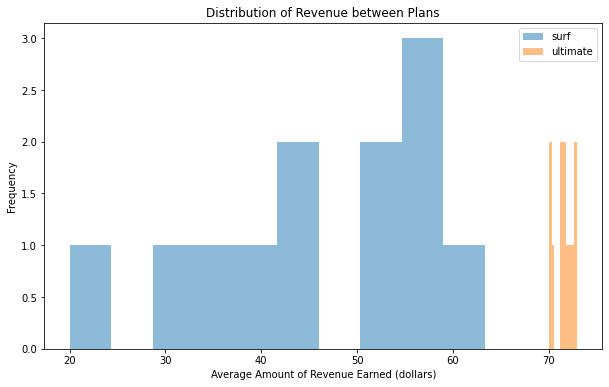

In [152]:
plt.figure(figsize=(10, 6))


plt.hist(Revenue_Avg_df['surf'], bins= 10, alpha=0.5, label='surf')
plt.hist(Revenue_Avg_df['ultimate'], bins= 10, alpha=0.5, label='ultimate')

plt.title('Distribution of Revenue between Plans')
plt.xlabel('Average Amount of Revenue Earned (dollars)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

This histogram shows the distribution of the average amount of revenue earned for both plans, Surf and Ultimate across various months. The X axis represents the average amount of revenue earned while the Y axis indicates the frequency or the most common averages that occured. The histogram helps visually compare which plans tend to have a higher or lower amounts of revenue on average and these averages are distributed across the bins, each bin representing a range of values not only one average.

Plan bars that are more towards the right indicate more revenue earned on average and if the bars are taller that suggests that the frequency revenue earned at that average amongst people is common for that specific plan. 

For the Surf plan labeled in blue, we see that the average amount of revenue earned per month for a person is most common between 55 and 60 dollars.

For the Ultimate plan labeled in orange, we see that the average amount revenue earned is most common at around 70 dollars, however its still much less frequent than the high of surf plans revenue. 

#This graph looks off because if they were all around 70$ then the frequency would be much higher for Ultimate? Not sure what I did wrong here, it also has nothing to do with number of people on the plan as it is just the averages?


In [153]:
surf_revenue_mean = Revenue_Avg[Revenue_Avg['plan'] == 'surf']['total_revenue'].mean()

surf_revenue_mean

46.28031541749831

In [154]:
surf_revenue_var = Revenue_Avg[Revenue_Avg['plan'] == 'surf']['total_revenue'].var()

surf_revenue_var

167.0558375760748

In [155]:
ultimate_revenue_mean = Revenue_Avg[Revenue_Avg['plan'] == 'ultimate']['total_revenue'].mean()

ultimate_revenue_mean

71.57970991419187

In [156]:
ultimate_revenue_var = Revenue_Avg[Revenue_Avg['plan'] == 'ultimate']['total_revenue'].var()

ultimate_revenue_var

0.9979461430038757

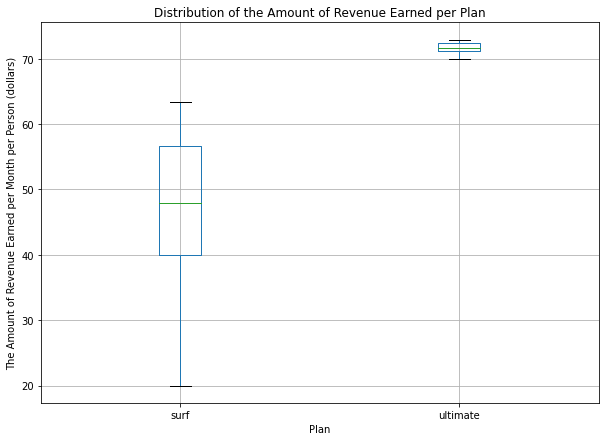

In [157]:
# Plot a boxplot to visualize the distribution of the monthly call duration
Revenue_Avg_df.plot(kind='box', figsize=(10, 7))
plt.title('Distribution of the Amount of Revenue Earned per Plan')
plt.ylabel('The Amount of Revenue Earned per Month per Person (dollars)')
plt.xlabel('Plan')
plt.grid(True)
plt.show()

Based on the data the Ultimate plan has a higher median of amount of Revenue Earned per month, just above $70 per person. 

While the surf plan has a lower median amount of Revenue Earned per Month between at around of $46.

The biggest difference of the two is that the ultimate plan's values are much less distributive than the surf plan. The vast majority of people on the ultimate plan are going to earn you more revenue at around 70, while the surf plan has a a more dispersed amount of earned revenue per person between 40 and 50 per month.

This basically means with the Ultimate plan theres less variability and you will be earning more revenue than the surf plan plan as well as it will almost always be at around $70 a month.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [161]:
# Test the hypotheses
surf_revenue = Revenue_Avg[Revenue_Avg['plan'] == 'surf']['total_revenue']
ultimate_revenue = Revenue_Avg[Revenue_Avg['plan'] == 'ultimate']['total_revenue']

alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We accept that the average revenue for Ultimate and Surf calling plans differ") # In this case if the value is below 0.05 than the Ultimate and Surf plans differ in revenue
else:
    print("We can't reject the null hypothesis") # In this case if the value is above 0.05 we can't say difinitevely that the plans are average revenues are different, if given more data


p-value:  8.564086105105441e-07
We accept that the average revenue for Ultimate and Surf calling plans differ


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [179]:
# Test the hypotheses
megaline_users_subset_data = megaline_users[['user_id', 'city']]

total_df_subset = Totals_DataFrame[['user_id', 'month', 'plan', 'total_revenue']]

totals_df_with_regions = pd.merge(total_df_subset, megaline_users_subset_data[['user_id', 'city']], on='user_id', how='left')

totals_df_with_regions


,user_id,month,plan,total_revenue,city
0,1000,12,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,surf,80.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,surf,50.00,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...
2288,1349,12,surf,20.33,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,5,surf,20.00,"Birmingham-Hoover, AL MSA"
2290,1482,10,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,12,ultimate,70.00,"Salt Lake City, UT MSA"


In [202]:
all_other_areas = totals_df_with_regions[totals_df_with_regions['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

all_other_areas[all_other_areas['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']

all_other_areas.head()

,user_id,month,plan,total_revenue,city
0,1000,12,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,surf,80.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,surf,50.00,"Seattle-Tacoma-Bellevue, WA MSA"


In [203]:
NY_NJ_area = totals_df_with_regions[totals_df_with_regions['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']

NY_NJ_area.head()

,user_id,month,plan,total_revenue,city
56,1014,11,surf,20.0000,"New York-Newark-Jersey City, NY-NJ-PA MSA"
57,1014,12,surf,36.9386,"New York-Newark-Jersey City, NY-NJ-PA MSA"
75,1022,5,surf,20.0000,"New York-Newark-Jersey City, NY-NJ-PA MSA"
76,1022,6,surf,90.0000,"New York-Newark-Jersey City, NY-NJ-PA MSA"
77,1022,7,surf,20.0000,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [201]:
revenue_NY_NJ_avg = NY_NJ_area['total_revenue']
revenue_others_avg = all_other_areas['total_revenue']



alpha = 0.05
results = st.ttest_ind(revenue_NY_NJ_avg, revenue_others_avg, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We accept that the average revenue between NY-NJ area is different than the average for all the other areas") 
else:
    print("We can't definitively say that the averages between NY-NJ and all the other regions are the same") 


p-value:  0.006851885492911961
We accept that the average revenue between NY-NJ area is different than the average for all the other areas


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Duration of Calls: 

Based on the data and graphs plotted the Ultimate plan had a slighltly higher average median duration of minutes on the phone per month at 400 minutes, while the surf plan was slightly below that and varied a little bit more meaning the range of data was less consistent to that mark. 

I would also like to say for ultimate the max number of minutes spent on the phone during a month was 1431 minutes much below the exceeding limits charge for the ultimate plan, I would suggest lowering the amount of minutes, however this may decentivize customers further from buying the plan.

Total Messages:

Based on the data the Ultimate plan had a much higher median total number of messages sent on the phone per month between 40-45 messages while the Surf plan was only at a median of around 35 messages. 

Also the Ultimate plans averages were less dispersed meaning if you are a person on the Ultimate Plan the likely hood of you being within the range of the median is much higher than the Surf plan. This is also well below the exceeding limits for the Ultimate Plan and, however there is a month where the average total messages were 48 for the surf data which means the company was gaining some benefit off of package limits for the surf plan

Data Usage: 

Based on the data the Ultimate plan had a higher median of amount of data used per month, between 16 and 18 megabytes, while the Surf plan is at a median 14-16 megabytes.

The biggest difference of the two is that the ultimate plan's values are much less dispersive than the surf plan. The vast majority of people on the ultimate plan are spending around 14 to 16 megabytes while customers on the Surf plan vary between the average going all the way down to 12 mb per month all the way to 18 mb per month.

## Revenue Conclusion

Based on the data shown the Ultimate plan has a higher median amount of revenue earned per month at just slightly above 70 dollars while for the surf plan the median revenue earned per month is around 46. Also to note here is that with the Surf plan you are earning more than 50% of the Monthly charge while with the Ultimate your basically just earning that monthly amount. 

The biggest difference between the two is the dispersion between values which makes sense because with the Ultimate plan you have to pay 70 dollars a month regardless and to reach the package limits for that deal it is exceedingly diffiuclt. With the Surf plan the range of average revenue per month values differ a lot.

In my analysis it is definitely clear that if you were to put money into advertising you are going to make more money with the Ultimate plan on average if you are able to get people to buy the plan, that is no doubt. 

The average revenue this company is recieving from the Ultimate plan is much higher than the Surf plan and thats given. The average included adding up each piece of revenue per user per plan for each individual month and then dividing the number of users. 

The average amount of revenue received were 71 dollars per month for Ultimate and only 46 dollars for the Surf plan.



